Desafio 29: Análise de Reclamações de Clientes

📂 Dataset: Dados simulados de reclamações registradas por clientes.
Colunas: Cliente, Data_Reclamacao, Tipo, Status, Canal

🎯 Tarefas:

Quantas reclamações foram registradas por mês?

Qual o tipo de reclamação mais comum?

Qual a proporção de status (Resolvido, Em andamento, Sem resposta)?

Qual canal recebeu mais reclamações?

Crie um gráfico de barras comparando a quantidade de reclamações por tipo.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dia_29_reclamacoes_clientes.csv")
df.head()

,Cliente,Data_Reclamacao,Tipo,Status,Canal
0,Cliente_75,2024-11-15,Atendimento ruim,Resolvido,Chat
1,Cliente_75,2025-02-26,Outros,Sem resposta,Redes Sociais
2,Cliente_33,2024-11-05,Cobrança indevida,Resolvido,E-mail
3,Cliente_41,2025-03-20,Atendimento ruim,Em andamento,Redes Sociais
4,Cliente_10,2025-01-11,Cobrança indevida,Sem resposta,E-mail


In [11]:
#Quantas reclamações foram registradas por mês?
df["Data_Reclamacao"] = pd.to_datetime(df["Data_Reclamacao"])
df["AnoMes"] = df['Data_Reclamacao'].dt.to_period('M')

reclamacoes = df['AnoMes'].value_counts()
print(f"Quantidade de reclamações por mês: \n{reclamacoes.to_string()}")

Quantidade de reclamações por mês: 
AnoMes
2025-03    53
2024-10    52
2024-11    51
2025-02    49
2024-12    49
2025-01    46
Freq: M


In [14]:
#Qual o tipo de reclamação mais comum?
reclamacaoComum = df["Tipo"].value_counts()
print(reclamacaoComum.idxmax())

Produto com defeito


In [17]:
#Qual a proporção de status (Resolvido, Em andamento, Sem resposta)?
proporcaoStatus = df["Status"].value_counts(normalize=True).reset_index()
proporcaoStatus.columns = ['Status', 'Proporcao']
proporcaoStatus["Proporcao"] = (proporcaoStatus["Proporcao"] * 100).round(2).astype(str) + '%'

print(proporcaoStatus)

         Status Proporcao
0  Sem resposta    35.67%
1  Em andamento    32.67%
2     Resolvido    31.67%


In [25]:
#Qual canal recebeu mais reclamações?
canalReclamacao = df["Canal"].value_counts()
print(f"O canal com mais reclamações foi: {canalReclamacao.idxmax()} ({canalReclamacao.max()} reclamações)")

O canal com mais reclamações foi: Telefone (81 reclamações)


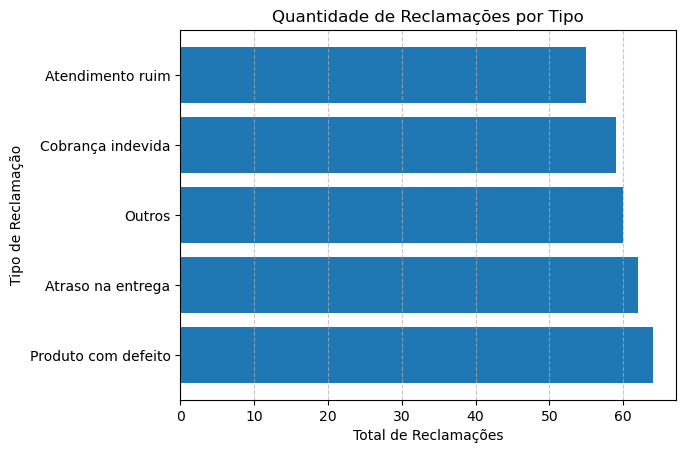

In [32]:
#Crie um gráfico de barras comparando a quantidade de reclamações por tipo.
plt.barh(reclamacaoComum.index, reclamacaoComum.values)
plt.title('Quantidade de Reclamações por Tipo')
plt.xlabel('Total de Reclamações')
plt.ylabel('Tipo de Reclamação')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()